# P1
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

---

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1.  Liste e descreva os principais passos no pipeline de uma aplicação típica em visão computacional.  

O pipeline típico de visão computacional conta com os passos descritos na imagem a seguir:

![q1](images\\q1.png)

### 2.  Na detecção de bordas utilizando o algoritmo de Canny, as bordas obtidas serão mais descontínuas, isto é, haverá mais interrupções nas linhas, se fizermos as seguintes alterações nos parâmetros dos limiares (threshold) inferior e superior de histerese: 

(a) incrementar o limiar superior; 
(b) diminuir o limiar superior; 
(c) aumentar o limiar inferior; 
(d) decrescer o limiar inferior; 
(e) diminuir ambos os limiares; 

  Resposta: (c) Explique:

Incrementar o limiar inferior faz com que vários casos de possíveis bordas, dentro da etapa de limite de histerese, sejam descartados. Da mesma forma, antigos casos de pssíveis bordas conectados a bordas certeiras deixaram de serem considerados. Isso pode ser melhor ilustrado pela imagem a seguir:

![q2](images\\q2.png)

O ponto C da imagem poderia deixar de ser uma possível borda e, assim, ocasionar uma interrupção de linha. Isso acontecimento pode ser generalizado para várias partes da imagem.

### 3.  Considerando a abordagem e os parâmetros envolvidos na implementação do algoritmo de Canny, explique como podemos aumentar probabilidade de encontrar uma maior quantidade de pontos de bordas nas imagens.

Para aumentar a quantidade de pontos de bordas localizados, pode-se fazer as seguintes mundanças:
- Diminuir o limiar superior, para que mais bordas sejam consideradas como absolutas
- Diminuir o limiar inferior, para que menas bordas sejam excluídas de serem possíveis bordas
- Não filtrar a imagem na fase de pré processamento, como forma de não reduzir variações bruscas nos pixels
- Erodir a imagem, para que fique com mais pontas

#### Exemplo:

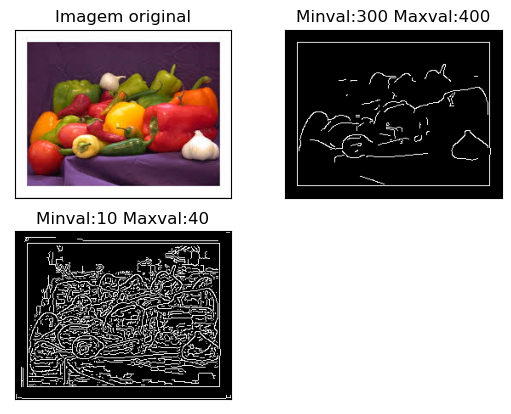

In [8]:
# Detecção de Canny RGB

img_pimenta = cv2.imread('images\pimenta.jpg')
edges1 = cv2.Canny(img_pimenta, 300, 400, L2gradient = True)
edges2 = cv2.Canny(img_pimenta, 10, 40, L2gradient = True)

# Plotar todos os resultados
titles = ['Imagem original', 'Minval:300 Maxval:400', 'Minval:10 Maxval:40']
images = [img_pimenta, edges1, edges2]
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 4.  Qual o propósito da supressão de não máximos no detector de Canny? 

O processo conhecido como supressão não máxima (supressão de valores de pixels que não forem máximos locais na direção transversal à borda) causa um afinamento da borda, atendendo à injunção de resposta múltipla, e uma limiarização adaptativa (histerese) com “complementação de bordas”, para eliminar a fragmentação dos contornos das bordas.

Busca ter certeza da remoção de pixels que podem não contituir uma borda. Para isso, averiguar cada pixel e ver se é um máximo local na direção do gradiente.

### 5. Suponha que você deve realizar uma correlação (para filtragem de ruído) entre uma imagem em um kernel sendo que a imagem possui valores constantes em uma determinada área e que o kernel seja dado pela matriz em (1).

![q5](images//q5.png)

a. Ao realizar a correlação da imagem com esse kernel em uma região da imagem de dimensões 20x20, cujos pixels possuem valores iguais a 50, qual o resultado obtido?

b. Esse resultado é correto? Explique. Se não for, avalie o que ser feito para corrigir o resultado.

c. Explique qual seria a uma possível razão do valor central ser maior que seus vizinhos.

In [9]:
# Criação da imagem de teste mencionada no enunciado
shape = (20,20)
img = np.ones(shape)
img *= 50

# Aplicação do Kernel
kernel = np.array([
  [1, 1, 1],
  [1, 2, 1],
  [1, 1, 1]
])

modified_img = cv2.filter2D(img, -1, kernel)

modified_img[0]

array([500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
       500., 500., 500., 500., 500., 500., 500., 500., 500.])

### a.
O kernel aplicado faz com que cada pixel tenha valor de 500, ao invés de 50.

### b.
Esse resultado é esperado para a formação de imagem que foi apresentado. Como a imagem teste possui valores constantes de 50 em toda sua dimensão, o kernel aplica uma operação de forma igualitária a todos os pixels, conforme mostrado a seguir:

(50*1)+(50*1)+(50*1)+(50*1)+(50*1)+(50*1)+(50*1)+(50*1)+(50*2) = 500

Com uma imagem sem valores constantes, o kernel aplica um filtro que realiza uma saturação extrema. O pixel central do kernel possui mais peso, portanto, se for muito grande pode acabar tornando a imagem muito borrada, tendendo ao branco.

### c.

A razão poderia ser semelhante a utilização de um filtro Gaussiano, que dá mais peso aos valores próximos de um valor médio. A partir disso, é possível fazer com que a imagem fique borrada.

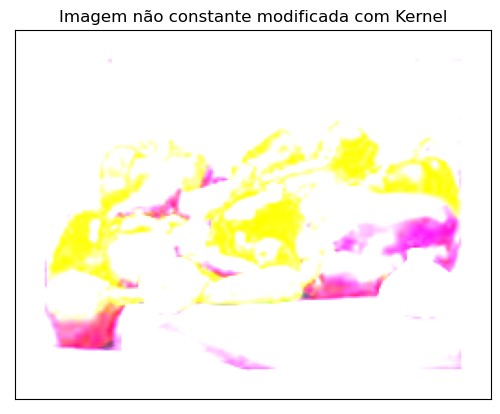

In [10]:
img1 = cv2.imread('images\\pimenta.jpg')

# Aplicação do Kernel
kernel = np.array([
  [1, 1, 1],
  [1, 2, 1],
  [1, 1, 1]
])

modified_img1 = cv2.filter2D(img1, -1, kernel)

modified_img1 = cv2.cvtColor(modified_img1, cv2.COLOR_BGR2RGB)
plt.title('Imagem não constante modificada com Kernel')
plt.imshow(modified_img1)
plt.xticks([]), plt.yticks([])  # Esconder eixo x e y
plt.show()

### 6. Mostre que uma aproximação da primeira derivada de uma imagem pode ser obtida pela convolução da imagem com um kernel [1 -1] onde uma linha da imagem é definida como:


 [56 64 79 89 120 126 132 133]

Ignore o primeiro e o último valor de pixel de saída para os cálculos (ou seja, sua saída
terá apenas seis valores).
Considerando a saída resultante, como seria possível identificar uma borda nos valores
obtidos? Explique? 

In [11]:
# Criação da imagem de teste mencionada no enunciado
img = np.array([56,64,79,89,120,126,132,133])

# Aplicação do Kernel
kernel = np.array([1,-1])

modified_img = []

for i in range(len(img)-1):
    pixel = img[i]*kernel[0] + img[i+1]*kernel[1]
    modified_img.append(pixel)

modified_img

[-8, -15, -10, -31, -6, -6, -1]

O resultado do kernel é:

[-8, -15, -10, -31, -6, -6, -1]

O que é análogo a realizar a taxa de variação entre os dois pixels (próximo_valor)-(valor_atual).

A forma mais simples de identificar bordas é por meio da variação brusca da intensidade do pixel, portanto, devemos ver onde há a maior variação no array resultando. Esse valor seria -31, que está mais próximo de ser uma borda. Não é possível dizer com certeza se o ponto é uma borda, por isso que existem métodos como a detecção de bordas de Canny, que possui várias etapas que aumentam a probabilidade de acerto.

### 7.  Quais são as duas operações realizadas pela operação Laplaciano do Gaussiano? 

Aguçamento de imagens e Detecção de linhas. O primeiro calcula a média e o segundo calcula a derivada de segunda ordem da imagem. Em seguida, são somados os resultados da derivada com a imagem original.

### 8.  Desenhe dois histogramas (hipotéticos) de duas imagens, sendo uma com alto contraste e a segunda com baixo contraste.

![q8](images\\q8.png)

### 9.  Explique os termos discretização e quantização relacionados a uma imagem digital. 

**Conversão de imagem contínua:**

- Digitalizar espacialmente é chamado de amostragem
- Digitalizar f(x,y) é chamado de dicretização (quantização)
  - Realizar uma escala com número inteiro para a luminosidade, normalmente é utilizado 8 bits.

**Processo de Quantização de uma Imagem**

Imagem é definida através de uma grandeza contínua. É necessário utilizar Variável Quantitativa Dicreta para representá-la, por isso, faz-se o processo de amostragem. 

Esse processo faz com que se obtenha uma matriz discreta e, assim, a amplitude da imagem é quantizada.

### 10. Quais são as formas de se calcular as distâncias entre dois pixels em uma imagem digital.

Distância euclidiana, city block e chessboard. 

A **distância euclidiana** é definido por:

![q10_1](images\\q10_1.png)

E se baseia em encontrar os pontos contidos em um disco de raio *r* centrado em *(x,y)*.

A **distância city block** é definida como:

![q10_2](images\\q10_2.png)

E determina a distância a partir da formação de um losango centrado em *(x,y)* e obtenção de pontos vizinhos próximos de *(x,y)*.

A **distância chessboard** é definida por: 

![q10_3](images\\q10_3.png)

E se parece com a forma de cálculo da distância city block, porém se baseia na formação de um quadrado ao invés de um losango.

### 11. Explique como podemos realizar a segmentação de imagens coloridas, representadas no formato RGB, utilizando a técnica de limiarização (thresholding). 

Segmentação de imagens é um tópico muito estudado em visão computacional e se trata na realização de um mapa de segmentação que isole um objeto ou ROI de interesse. Isso pode ser feito tanto com processamento de imagens como com redes neurais.

A segmentação por cores é um dos métodos que podem ser utilizados. É mais intuitivo o uso do modelo de representação de cores Lab, pois separa os diferentes tipos de cores pelo HUE. Porém, melhores resultados são obtidos com o RGB.

Tentamos obter um intervalo que representa a cor que queremos usar para classificar o objeto, isso se resume a encontrar um vetor no espectro RGB que tome como base a cor selecionada para segmentação. Com isso, é configurada uma distância euclidiana que vai representar o intervalo aceitável.